            
## Machnine learning model to classify articles of clothing using Tensor Flow


In [1]:
#import libraries
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

Import dataset from keras

In [2]:
clothing_data = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = clothing_data.load_data()

article_names = ['T-Shirt/Top', 'Pants', 'Pullover Jacket', 'Dress', 'Coat', 'Heel/Sandal', 'Shirt', 'Sneaker', 'Bag', 'Boot']

Preprocess data such that the images have range 0-1

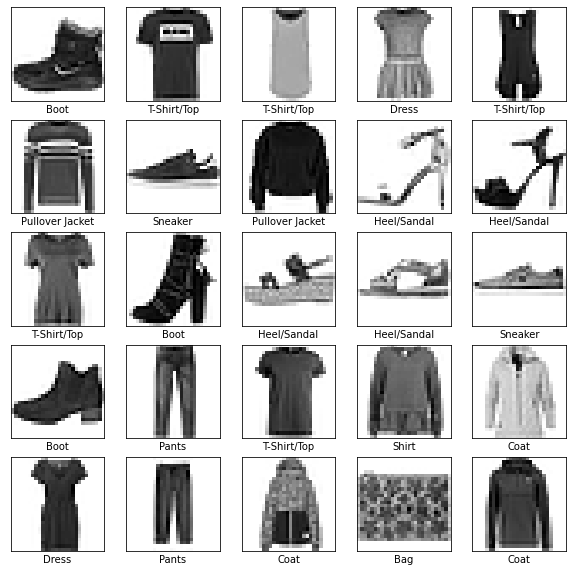

In [3]:
train_images = train_images / 255.0
test_images = test_images / 255.0

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(article_names[train_labels[i]])
plt.show()

Model Building and setting up layers
* Flatten resizes the images
* Dense represents layers for determining output.
  * First layers.dense represents the first layer with 128 nodes,
  * The second represents the output, 10 different output choices, or articles of clothes

In [4]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10)
])

# Compile the Model
* Optimizer- Adjusts the model based on performance, looks at loss function.
* Loss- represents how accurate the model is when trained.
* Metrics- Set to represent the accuracy of predicting the image correctly.

In [5]:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

# Train the model with .fit
Input the data to be looked at, and the desired output. Epochs will break up the training into 10 groups, will speed up training.

In [6]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4989 - accuracy: 0.8249
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3753 - accuracy: 0.8649
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3383 - accuracy: 0.8758
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3115 - accuracy: 0.8851
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2964 - accuracy: 0.8910
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2815 - accuracy: 0.8970
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2698 - accuracy: 0.8997
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2567 - accuracy: 0.9051
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2501 - accuracy: 0.9067
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.240

# Evaluating the model on the test data.
* model is overfitting as the test data produces worse accuracy

In [7]:
test_loss, test_metrics = model.evaluate(test_images, test_labels)
print(f'Accuracy: {test_metrics:0.3f}')

313/313 [==============================] - 0s 1ms/step - loss: 0.3307 - accuracy: 0.8854
Accuracy: 0.885


# Probability model
* Softmax will switch the type from logits to probabilities. Helps with interpretation

In [8]:
prob_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])

In [9]:
pred = prob_model.predict(test_images) #stores predicted values for each test_image value

In [10]:
# Prints each image with the probabilities and highest guess
def pred_print(idx, pred, test_images, test_labels, names):
  prediction, img, label = pred[idx], test_images[idx], test_labels[idx]
  plt.imshow(img, cmap=plt.cm.binary)
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  pred_label = np.argmax(prediction)
  if pred_label == label:
    color = 'green'
  else:
    color = 'red'
  plt.xlabel("{} {:2.0f}% ({})".format(names[pred_label], 100*max(prediction), names[label]), color=color)

# Check the model
* Ouputs the image, accuracy, and article. The index for the image is the first argument


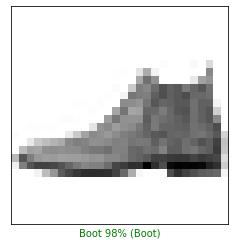

In [11]:
pred_print(0, pred, test_images, test_labels, names=article_names)